<a href="https://colab.research.google.com/github/JoaoLoboIT/LH_CD_JOAOLOBO/blob/main/indicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Cientista de Dados**
## João Pedro Ferreira Lobo, aluno de Sistemas de Informação da UFOP
### Linkedin: https://www.linkedin.com/in/joaoplobo/
### GitHub: https://github.com/JoaoLoboIT


# 1 - Análise Exploratória dos Dados (EDA)
## 1.1 - Informações do conjunto de dados


1.   Series_Title: Título do filme [object]
2.   Released_Year: Ano em que o filme foi lançado[object]
3.   Certificate: Classifição do filme, sugerindo uma idade indicada. Variável catgórica [object]
4.   Runtime: Duração do filme [object]
5.   Genre: Gênero do filme [object]
6.   IMDB_Rating: Nota média do filma, avaliada pelos usuários do site IMDb [float64]
7.   Overview: Resumo rápido do filme [object]
8.   Meta_score: Pontuação calculada pelo site Metacritic  [float64]
9.   Director: Diretor do filme [object]
10.   Star1: Ator Principal 1 [object]
11.   Star2: Ator Principal 2 [object]
12.   Star3: Ator Principal 3 [object]
13.   Star4: Ator Principal 4 [object]
13.   No_of_Votes: Número total de votos da avaliação [int64]
14.   Gross: Receita bruta da bilheteria do filme [object]



In [ ]:
# Importando os pacotes que serão utilizados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Carregando arquivo csv
df_original = pd.read_csv('desafio_indicium_imdb.csv')

## 1.2 - Avaliar o conjunto de dados de forma macro para compreender os dados

In [ ]:
# Verificando as primeiras linhas do DataFrame
df_original.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.90,Gandalf and Aragorn lead the World of Men agai...,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
# Verificando o shape do arquivo
df_original.shape

(999, 16)

In [ ]:
# Verificando as informações do arquivo
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


## 1.3 - Verificar se existe valores nulos

In [ ]:
df_original.isnull().sum()

,0
Unnamed: 0,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


### 1.3.1 - Após uma visão geral das variáveis e os tipos de cada uma, se faz necessário o tratamento de alguns dados

In [ ]:
# Criar novo df para tratamento
df_tratado = df_original.copy()

# Mudando Released_Year para Datetime
df_tratado['Released_Year'] = pd.to_datetime(df_tratado['Released_Year'], errors='coerce') # Passando errors pois tinha um valor problemático "PG"


# Mudando Runtime para TimeDelta
df_tratado['Runtime'] = pd.to_timedelta(df_tratado['Runtime'])

# Mudando Gross para Float
df_tratado['Gross'] = df_tratado['Gross'].str.replace(',', '').astype(float)

# Tratando valores nulos para colunas numéricas
# Seguindo uma boa prática, calcula-se a mediana da coluna e troca o valor nulo pela mesma, evitando outliers

# Meta Score
mediana_meta_score = df_tratado['Meta_score'].median()
df_tratado['Meta_score'] = df_tratado['Meta_score'].fillna(mediana_meta_score)
# Gross
mediana_gross = df_tratado['Gross'].median()
df_tratado['Gross'] = df_tratado['Gross'].fillna(mediana_gross)

# Tratando valores nulos para colunas categóricas
moda_certificate = df_original['Certificate'].mode()[0] # Usando 0 para retornar apenas um número caso tenha empate
df_tratado['Certificate'] = df_tratado['Certificate'].fillna(moda_certificate)


## 1.4 - Verificar os valores únicos em cada variável

In [ ]:
# Total de valores únicos de cada variável

valores_unicos = []
for i in df_tratado.columns[0:16].to_list():
  print(i, ':', len(df_tratado[i].astype(str).value_counts()))
  valores_unicos.append(len(df_tratado[i].astype(str).value_counts()))

Unnamed: 0 : 999
Series_Title : 998
Released_Year : 100
Certificate : 16
Runtime : 140
Genre : 202
IMDB_Rating : 16
Overview : 999
Meta_score : 63
Director : 548
Star1 : 659
Star2 : 840
Star3 : 890
Star4 : 938
No_of_Votes : 998
Gross : 823


## 1.5 - Visualizar as medidas estatísticas principais do conjunto de dados
### Média | Mediana | Desvio Padrão | Quartis | Valores mínimos e máximos

In [ ]:
df_tratado.describe(include='all')

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999.00,999,998,999,999,999,999.00,999,999.00,999,999,999,999,999,999.00,999.00
unique,NaN,998,NaN,16,NaN,202,NaN,999,NaN,548,659,840,890,938,NaN,NaN
top,NaN,Drishyam,NaN,U,NaN,Drama,NaN,A man in London tries to help a counter-espion...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,NaN,2,NaN,335,NaN,84,NaN,1,NaN,14,12,7,5,4,NaN,NaN
mean,500.00,NaN,1991-03-20 10:33:25.611222400,NaN,0 days 02:02:52.312312312,NaN,7.95,NaN,78.13,NaN,NaN,NaN,NaN,NaN,271621.42,60533377.16
min,1.00,NaN,1920-01-01 00:00:00,NaN,0 days 00:45:00,NaN,7.60,NaN,28.00,NaN,NaN,NaN,NaN,NaN,25088.00,1305.00
25%,250.50,NaN,1976-01-01 00:00:00,NaN,0 days 01:43:00,NaN,7.70,NaN,72.00,NaN,NaN,NaN,NaN,NaN,55471.50,5011838.50
50%,500.00,NaN,1999-01-01 00:00:00,NaN,0 days 01:59:00,NaN,7.90,NaN,79.00,NaN,NaN,NaN,NaN,NaN,138356.00,23457439.50
75%,749.50,NaN,2009-01-01 00:00:00,NaN,0 days 02:17:00,NaN,8.10,NaN,85.50,NaN,NaN,NaN,NaN,NaN,373167.50,61576564.50
max,999.00,NaN,2020-01-01 00:00:00,NaN,0 days 05:21:00,NaN,9.20,NaN,100.00,NaN,NaN,NaN,NaN,NaN,2303232.00,936662225.00


## 1.5 - Avaliar as variáveis de forma individual através de gráficos
### Análise simples porém visual, para visualizarmos melhor os dados preparando as ideias para futuras análises e modelos


#### 1.5.1 - Histograma da variavel alvo, IMDB. A visualização em histograma nos permite ver que a maioria das notas estão entre 7.5 e 8.5, ou seja, a grande parte dos filmes são bem avaliados.


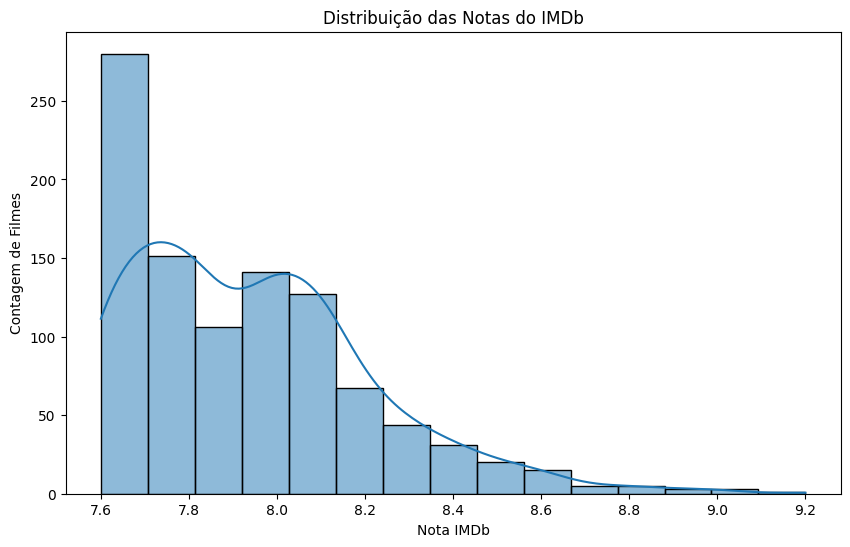

In [ ]:
# Distribuição de notas do IMDb

plt.figure(figsize=(10, 6))
sns.histplot(data=df_tratado, x='IMDB_Rating', kde=True, bins=15)
plt.title('Distribuição das Notas do IMDb')
plt.xlabel('Nota IMDb')
plt.ylabel('Contagem de Filmes')
plt.show()

#### 1.5.2 - Através desse gráfico de barras vimos que no nosso DataFrame, a maioria dos filmes tem a classificação igual a U, além de que mais de 10 tipos de classificação aparecem muito pouco entre os filmes


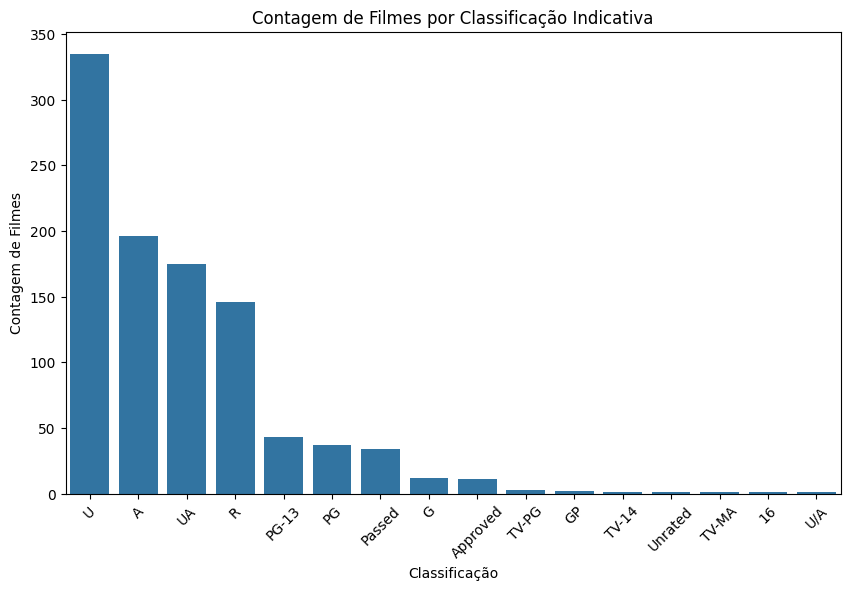

In [ ]:
# Contagem de Filmes por Classificação (Certificate)

plt.figure(figsize=(10, 6))
sns.countplot(x='Certificate', data=df_tratado, order=df_tratado['Certificate'].value_counts().index)
plt.title('Contagem de Filmes por Classificação Indicativa')
plt.xlabel('Classificação')
plt.ylabel('Contagem de Filmes')

# Rotaciona os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=45)
plt.show()

#### 1.5.3 - Este histograma mostra que a grande maioria dos filmes possui um número relativamente baixo de votos, enquanto um grupo muito pequeno de filmes extremamente populares acumula milhões de votos. Vendo esse gráfico pode-se lembrar até de um problema discutido no meio do cinema nos últimos anos, em que a maioria dos filmes publicados tem um número muito baixo de bilheteria, enquanto uma parte muito pequena tem bilheterias


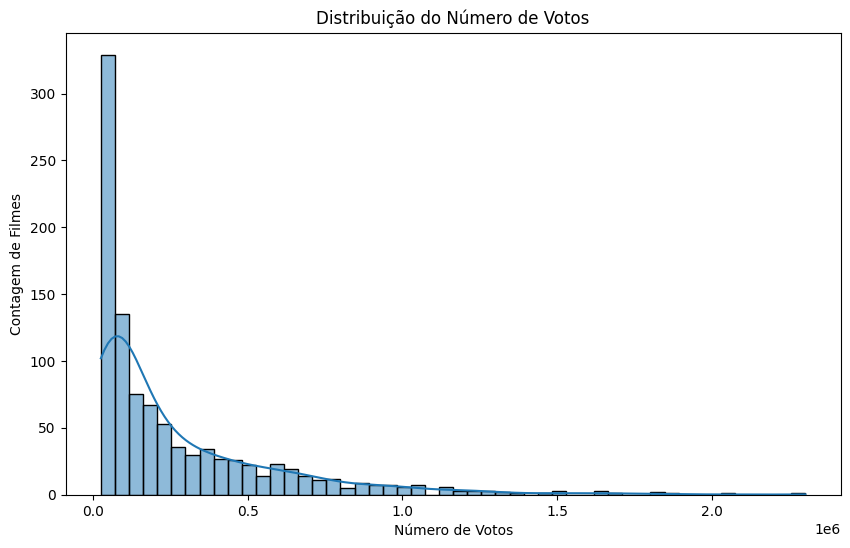

In [ ]:
# Distribuição do Número de Votos
plt.figure(figsize=(10, 6))
sns.histplot(df_tratado['No_of_Votes'], bins=50, kde=True)
plt.title('Distribuição do Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Contagem de Filmes')
plt.show()

#### 1.5.4 - Aqui podemos ver o padrão de duração dos filmes

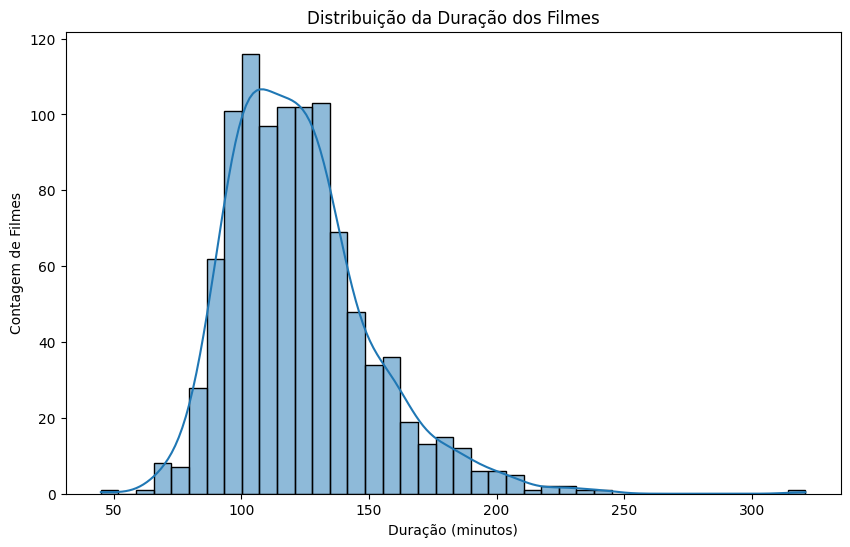

In [ ]:
# Distribuição da Duração dos Filmes (Runtime)
# Convertendo timedelta para minutos totais para facilitar a plotagem
df_tratado['Runtime_minutos'] = df_tratado['Runtime'].dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.histplot(df_tratado['Runtime_minutos'], bins=40, kde=True)
plt.title('Distribuição da Duração dos Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Contagem de Filmes')
plt.show()

## 1.6 - Analisar possíveis Outliers


#### Primeiro, pegamos todas variáveis do tipo numérico

In [ ]:
variaveis_numericas = df_tratado.select_dtypes(include=np.number).columns.tolist()

# Removendo 'Unnamed: 0'
if 'Unnamed: 0' in variaveis_numericas:
    variaveis_numericas.remove('Unnamed: 0')

print("Variáveis numéricas que serão plotadas:")
print(variaveis_numericas)

Variáveis numéricas que serão plotadas:
['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime_minutos']


#### Depois, criamos os Subplots e plotamos cada Boxplot

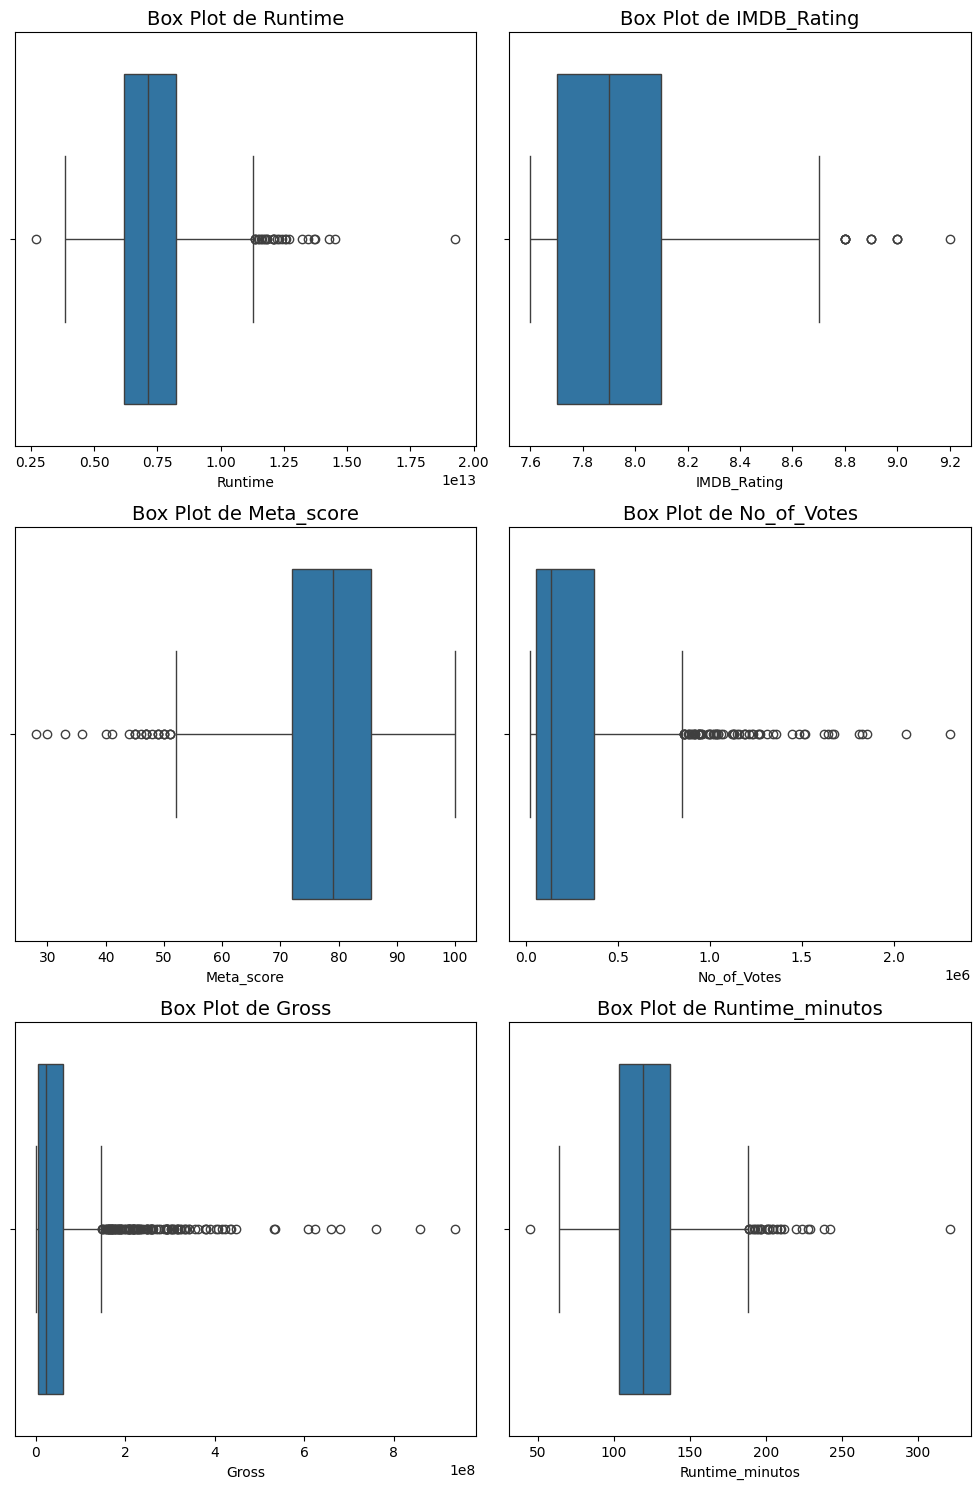

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

for ax, coluna in zip(axes.flatten(), variaveis_numericas):
    sns.boxplot(data=df_tratado, x=coluna, ax=ax)

    ax.set_title(f'Box Plot de {coluna}', fontsize=14)

plt.tight_layout()
plt.show()

### 1.6.1 - Tratar Outliers
#### Agora que já os vizualizamos, vamos excluí-los para esse valores extremos não atrapalharem o futuro modelo




In [ ]:
# df_tratado -> primeiro tratamento no df original: nulls, nan, nat
# df_tratadissimo -> df tratado sem outliers

df_tratadissimo = df_tratado.copy()

# Usando o Método Tukey
for coluna in variaveis_numericas:
    Q1 = df_tratadissimo[coluna].quantile(0.25)
    Q3 = df_tratadissimo[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_tratadissimo = df_tratadissimo[
        (df_tratadissimo[coluna] >= limite_inferior) &
        (df_tratadissimo[coluna] <= limite_superior)
    ]

print(f"Número de linhas ANTES de remover outliers: {len(df_tratado)}")
print(f"Número de linhas DEPOIS de remover outliers: {len(df_tratadissimo)}")

Número de linhas ANTES de remover outliers: 999
Número de linhas DEPOIS de remover outliers: 763
